# Markov chain Monte Carlo

- A different approach to sample distributions is based on the construction
  of a Markov chain.
  
- It will turn out to be a very powerful approach.

- It will also introduce some difficulties. In particular, the samples that will
  be generated are *no longer going to be independent*.
  
- We will therefore have to be careful when estimating error bars.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('style.mpl')

# Markov chain and transition probability

- A Markov chain is a sequence of elements $x_1 \to x_2 \to x_3 \to x_4 \to \ldots$
  generated by a Markov process.
  
- It is characterized by a *transition probability* $p(x \to y)$. It is normalized
  $\sum_y p(x \to y) = 1$.

- During the Markov process, a new element $x_{n+1}$ is added to the chain with
  a probability $p(x_n \to x_{n+1})$.

- This transition probability only depends on the previous element, there is
  no memory of the distant past of the chain.
  
- We will also suppose *ergodicity*, i.e. there is a non-zero probability path
  between any two $x$ and $y$.

# Equilibrium probability distribution

- What is the probability to be in a given $x$ at step $n+1$?

  \begin{align*}
  \pi_{n+1} (x) &= \sum_{y \ne x} \pi_n(y) \, p(y \to x) + \pi_n(x) \, p(x \to x) \\
  &= \sum_{y \ne x} \pi_n(y) \, p(y \to x) + \pi_n(x) \, \big( 1 - \sum_{y \ne x} p(x \to y) \big) 
  \end{align*}
  
- Suppose the distribution becomes stationary $\pi(x) = \pi_{n+1}(x) = \pi_n(x)$
  
- Simplifying the equation above we obtain

  \begin{equation*}
  \sum_{y \ne x} \pi(x) \, p(x \to y) = \sum_{y \ne x} \pi(y) \, p(y \to x)
  \end{equation*}


# Global and detailed balance

- Let's say we want to sample a distribution $\pi(x)$ using a Markov chain Monte Carlo.

- It is enough to find a transition probability $p(x \to y)$ that satisfies
  the **global balance condition**

  \begin{equation*}
  \boxed{
  \sum_{y} \pi(x) \, p(x \to y) = \sum_{y} \pi(y) \, p(y \to x)}
  \end{equation*}

- The condition above is necessary, but it is often simpler to design transition
  probabilities that satisfy the stronger **detailed balance condition**
  
  \begin{equation*}
  \boxed{
  \pi(x) \, p(x \to y) = \pi(y) \, p(y \to x)}
  \end{equation*}

- The game is now to find a recipe to find $p(x \to y)$.

# Example: the pebble game

- Consider a $3 \times 3$ tiling. A pebble is sitting on one of the
  tiles $k \in \{0, \ldots, 8\}$.

- We want to move the pebble to one of its neighbors with a transition
  probability $p(x \to y)$ such that the pebble will have a uniform
  distribution over the tiling $\pi_k = 1/9$.
  
- The detailed balance imposes $p(x \to y) = p(y \to x)$.

&nbsp;
<center>
<img src="figures/cells.png" alt="Drawing" style="height: 200px;"/>
</center>

- We can use the following transition rules:

  - The probability to move to a neighbor is $1/4$. This ensures that
    $p(x \to y) = p(y \to x)$.
    
  - If there are less than 4 neighbors (edge, corner) the pebble can
    stay on its tile with the remaining probability.

In [2]:
L = 3
n_samples = 2**14
samples = np.zeros(n_samples, dtype=int)

for i in range(n_samples-1):
    
    # k -> (x,y)
    coord = np.unravel_index(samples[i], [L,L])
    
    # pick random shift (prob 1/4)
    ind = np.random.randint(2)
    shift = np.zeros(2, dtype=int)
    shift[ind] = np.random.choice([-1,1])
    
    # new (x,y) -> clip inside square -> k
    coord += shift
    samples[i+1] = np.ravel_multi_index(coord, [L,L], mode='clip')

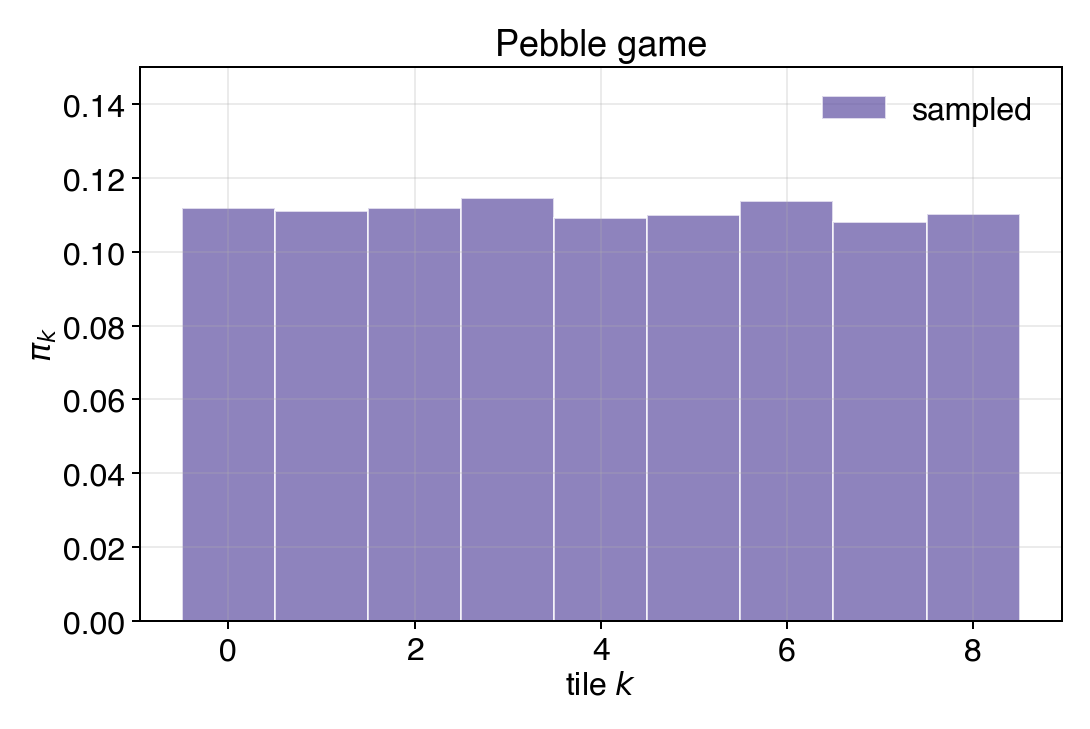

In [3]:
fig, ax = plt.subplots()
ax.hist(samples, bins=np.arange(-0.5, L**2+0.5), density=True, ec='w', alpha=0.7, label='sampled')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlabel("tile $k$")
ax.set_ylabel("$\pi_k$");
ax.set_ylim(0, 0.15)
ax.set_title("Pebble game");

# Summary

- Markov chain Monte Carlo (MCMC) is a different way to generate samples $x_i$
  that are distributed according to some probability $\pi$.
  
- A desired probability $\pi$ is obtained by choosing the transition probability
  such that it satifies the global balance condition

  \begin{equation*}
  \sum_{y} \pi(x) \, p(x \to y) = \sum_{y} \pi(y) \, p(y \to x)
  \end{equation*}
  
  or the detailed balance condition
  
  \begin{equation*}
  \pi(x) \, p(x \to y) = \pi(y) \, p(y \to x)
  \end{equation*}

- Finding a good transition probability is not trivial. If we change the rules of
  the pebble game and ask that the probability to sit on the tile $k$ is some $\pi_k$. What
  should I choose for $p(x \to y)$?
  
- MCMC algorithms provide recipes to find $p(x \to y)$. There are many of them, e.g.
  the Glauber, Wolff, heat bath algorithms, etc. We will focus on the
  **Metropolis-Hastings** algorithm.

- Unlike direct sampling, Markov chain sampling generates *correlated*
  samples. We will have to keep this in mind!

# Outline
    
- [Introduction to Monte Carlo](01-intro_monte_carlo.slides.html)

- [Newton–Cotes quadrature](02-newton_cotes.slides.html)
  
- [Importance sampling](03-importance_sampling.slides.html)

- [Direct sampling methods](04-direct_sampling.slides.html)

- [Markov chain sampling and balance condition](05-markov_chain.slides.html)

- [Metropolis-Hastings algorithm](06-metropolis_hastings.slides.html)

- [The two-dimensional Ising model](07-ising.slides.html)

- [Error bar analysis](08-error_analysis.slides.html)
  
- [References](09-references.slides.html)